In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
wine_dataset = pd.read_csv('winequality-white.csv')

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

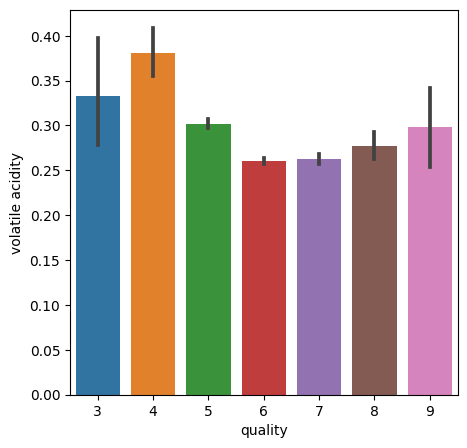

In [4]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= wine_dataset)

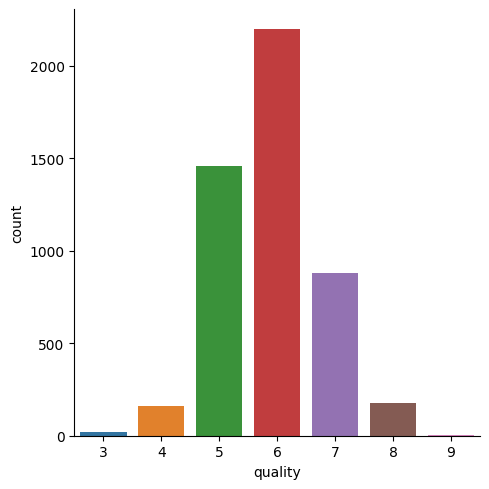

In [5]:
sns.catplot(x = 'quality', data= wine_dataset, kind='count')

In [6]:
correlation = wine_dataset.corr()

<AxesSubplot: >

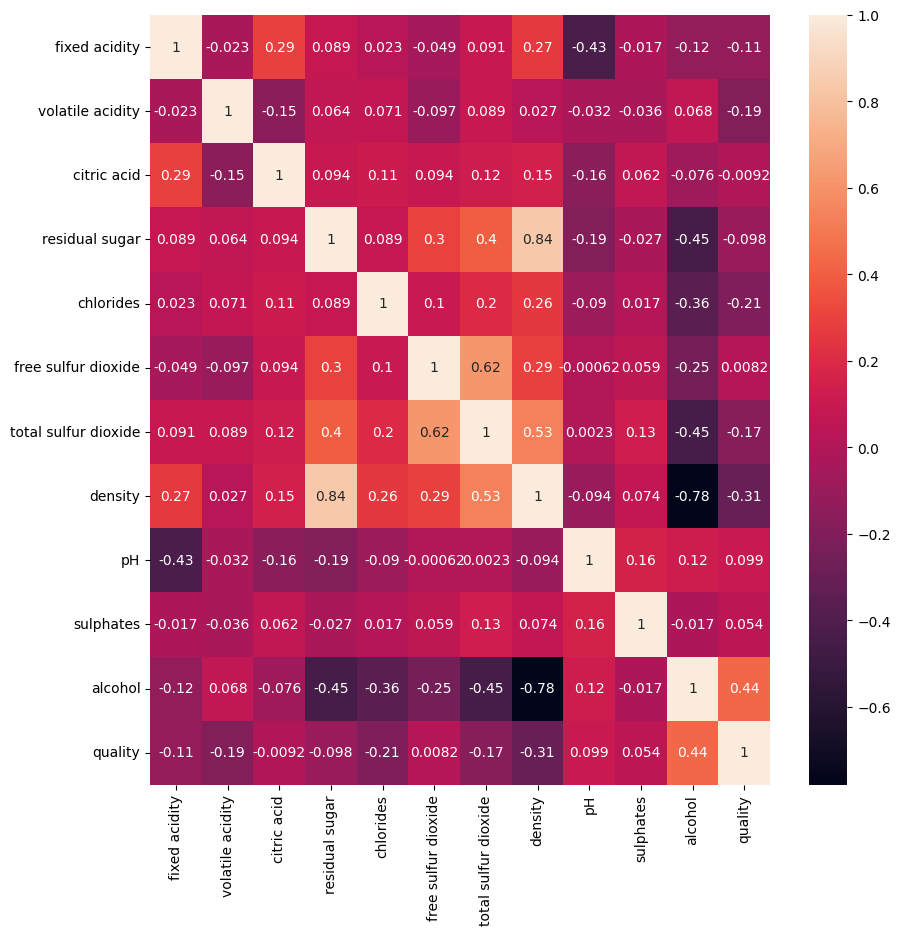

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot= True)

In [8]:
X = wine_dataset.drop('quality', axis=1)

In [9]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [10]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=8 else 0)

In [11]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    0
4897    0
Name: quality, Length: 4898, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4898,) (3918,) (980,)


In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(X_train, Y_train);

In [16]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [17]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9755102040816327


In [18]:
input_data = (8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print('Good Quality White Wine')
else:
    print('Bad Quality White Wine')

[0]
Bad Quality White Wine


c:\Users\Somar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(X_test, Y_test) * 100

97.55102040816327